# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [113]:
education = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [114]:
education.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
np.NaN
education.dropna()
education["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
education.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
education.isna().sum()
education.head(15)

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,488476.0,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,104321.0,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,80937.0,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,1981407.0,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN
10,1992_GEORGIA,GEORGIA,1992,1207186.0,5536901.0,398701.0,2798674.0,2339526.0,5535942.0,3043984.0,...,99648.0,92374.0,63646.0,NaN,NaN,1207186.0,216.0,259.0,212.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

How many years of data are logged in our dataset? 

In [115]:
print(education["YEAR"].nunique())

13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [116]:
Michigan_info = education[(education["STATE"] == "MICHIGAN")]
print(Michigan_info["AVG_MATH_4_SCORE"].mean())
Ohio_info = education[(education["STATE"] == "OHIO")]
print(Ohio_info["AVG_MATH_4_SCORE"].mean())

234.36363636363637
239.45454545454547


Find the average for your chosen test across all states in 2019

In [117]:
States_info = education.groupby("STATE")
States_info["AVG_MATH_4_SCORE"].mean()

STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [118]:
States_info = education.groupby("STATE")
States_info["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [130]:
education['TOTAL_EXPENDITURE_PER_STUDENT'] = education['TOTAL_EXPENDITURE'] / education['ENROLL_ALL_EST']
education['ENROLLMENT_RATE_4_AGAINST_KINDER'] = (education['ENROLL_KINDER'] / education['ENROLL_4'])

Feature engineering justification: The variable that I am looking to explore is the average math score of 4th grade students. When looking at the data set, I will like to focus on two particular factors that might affect the outcome. The first factor that I would like to explore is how expenditure might affect academic achievement. My prediction would be that the higher the expenditure the higher the test score, as students can get acces to better resources, teachers, etc, which can help improve their scoring. To do this I am going to create a new_column called expenditure per student and it is going to be calculated by dividing Total Expenditure by Total enrollment in the state. This would be under the asumption that funding is equally distributed among all schools, grades, etc. The second factor that I would like to explore is how the enrollement rate in kinder can possibly affect the average math score of 4th grade. My prediction would be that the higher the enrollment rate the better the kid have nailed down the basics and are better acostumed to a different kind of thinking than their homeschooled counter part. For this I created a new column that sums up the total enrollment in kinder and divides it by the total number of students in 4th grade in order to get the enrollment rate. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

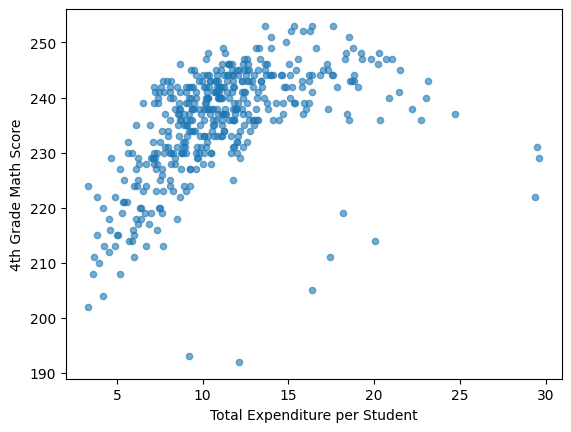

In [122]:
education.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Total Expenditure per Student')
plt.ylabel('4th Grade Math Score')

In the scatter plot above we can see how the data is distributed in terms of the avergae foruth grade math score and the total expenditure per student. There seems to be a positive relationship between the two variables, as the higher the expenditure, the higher the math scores tend to be. 

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

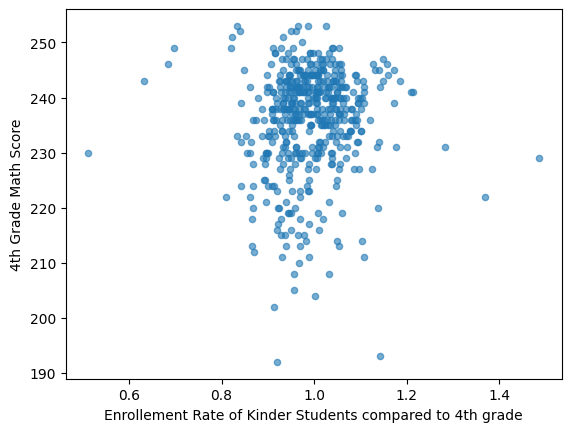

In [131]:
education.plot.scatter(x='ENROLLMENT_RATE_4_AGAINST_KINDER', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Enrollement Rate of Kinder Students compared to 4th grade')
plt.ylabel('4th Grade Math Score')

In the scatter plot above, we can see how the data is distributed in terms of the enrollment rate of Kinder Students compared to 4th grade students against the 4th grade math score. There seems to be almost no correlation as the enrollment rate of Kinder Students compared to 4th grade seems to be almost the same, thus there is almost no variability suggesting the possibility that a relationship does not exist. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [132]:
from sklearn.model_selection import train_test_split

In [152]:
# X =
# y = 
X = education[['ENROLLMENT_RATE_4_AGAINST_KINDER','TOTAL_EXPENDITURE_PER_STUDENT','AVG_READING_4_SCORE']].dropna()
y = education.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [153]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [154]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [155]:
# create your model here
# model = 
model = LinearRegression()

In [156]:
model.fit(X_train, y_train)

LinearRegression()

In [157]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [162]:
np.mean(model.predict(X_test)-y_test)
model.score(X_test, y_test)

0.6704823765429361

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

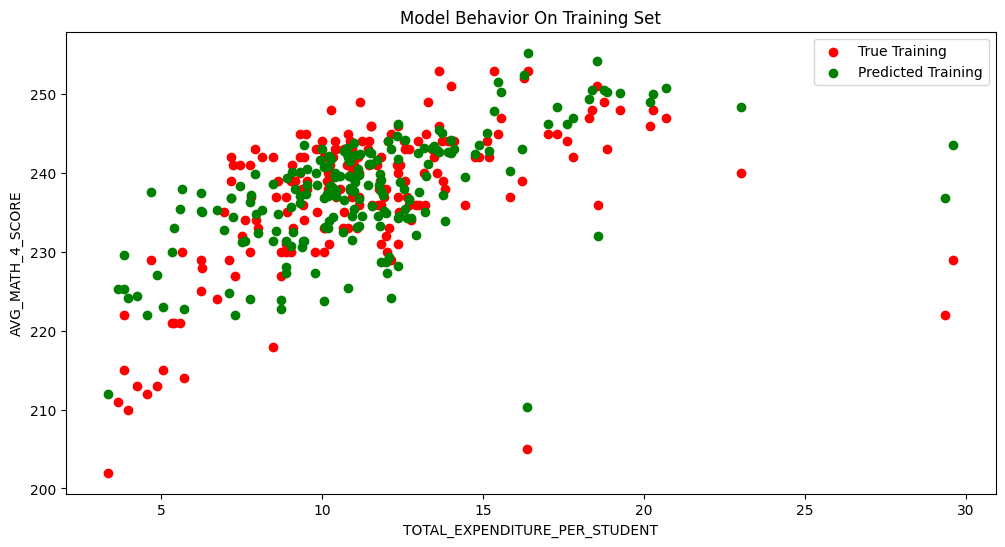

In [160]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

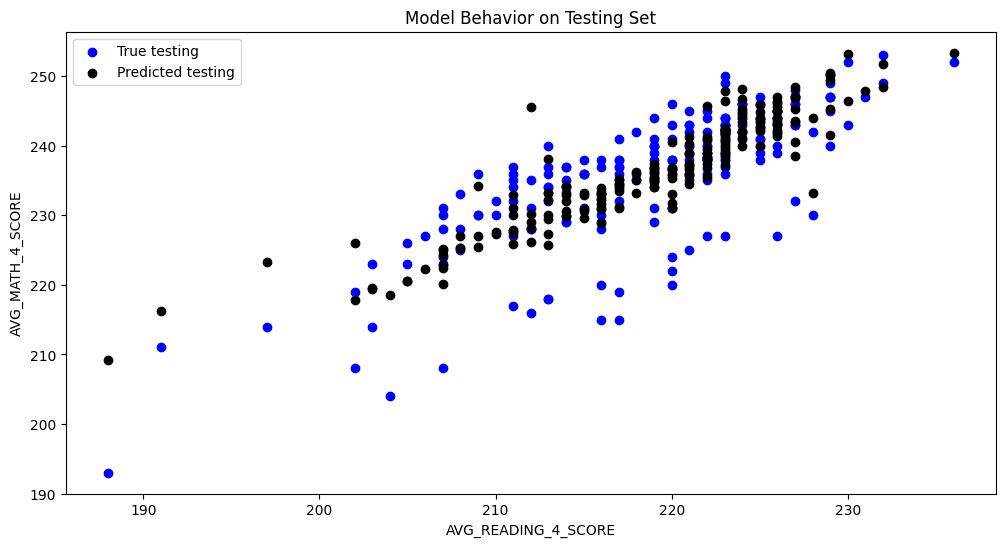

In [163]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

Overall, when studying possible factors that might affect the average reading score in 4th grade some conclusion can be made. Firstly, it was originally predicted that the higher the expenditure the higher will be the results of the 4th grade math score this is because with higher expenditure students have acces to better resources, better teachers,etc, which can help them preform better academically. This prediction was supported by the data set, in the scatter plot above a positive correlation can be seen and in the training data set a similar agument can be made. Continously, another factor that was studied was kinder enrollment rate. It was believed that this would positively affect our 4th grade math score as going to school from a young age ensures that the students begins developing a way of thinking that will potentially help them thrive in the future. However, this factor could be dismissed as there does not seem to be a large difference between kinder enrollment rate and 4th grade enrollment rate which ultimately means that there is no clear correlation with 4th grade math score. This can potentially makes sense as going to school has become more ingraned in our culture thus possibly explaining the results. Finally, it was looked at how average reading scores can affect math score. From out training data set, we can see how higher reading scores tend to be asociated with higher math scores. This can potentially make sense as the students can comprehend the problems better helping their scoring. However, it is important to note that there was some gaps in the data begining with null values for some years and some states. Additionally, several assumptions were made like for example wehn calculating the expenditure per student it was assummed that states distributed spending equally between schools and all grades which is not likely the case thus assumptions like this are important to keep in mind when reflecting upon the data. 